In [7]:
#import pandas library and load dataset
import pandas as pd
dataset= 'Immunisation.xlsx'
df = pd.read_excel(dataset)
df = df.dropna()  #dropping null values 
df['period'] = df['period'].astype('datetime64')
print('Shape of the Dataset', df.shape)
df.head(2)


Shape of the Dataset (52, 2)


,period,fully_immunized
0,2017-01-01,177
1,2017-02-01,159


<AxesSubplot:>

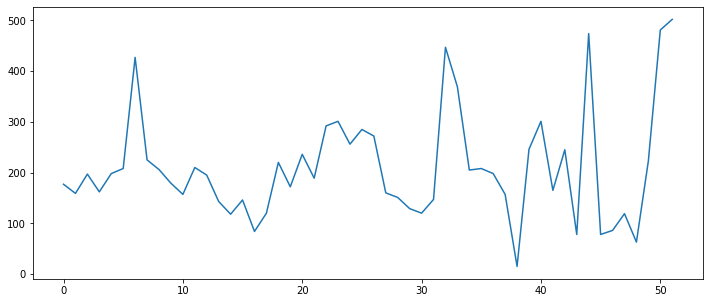

In [8]:
from matplotlib import pyplot as plt
import numpy as np
df['fully_immunized'].plot(figsize=(12,5))

In [9]:
#set Date as index
df.set_index('period', inplace=True)
df.head(5)
df.tail(5)

,fully_immunized
period,
2021-04-01,119
2021-05-01,63
2021-06-01,223
2021-07-01,481
2021-08-01,502


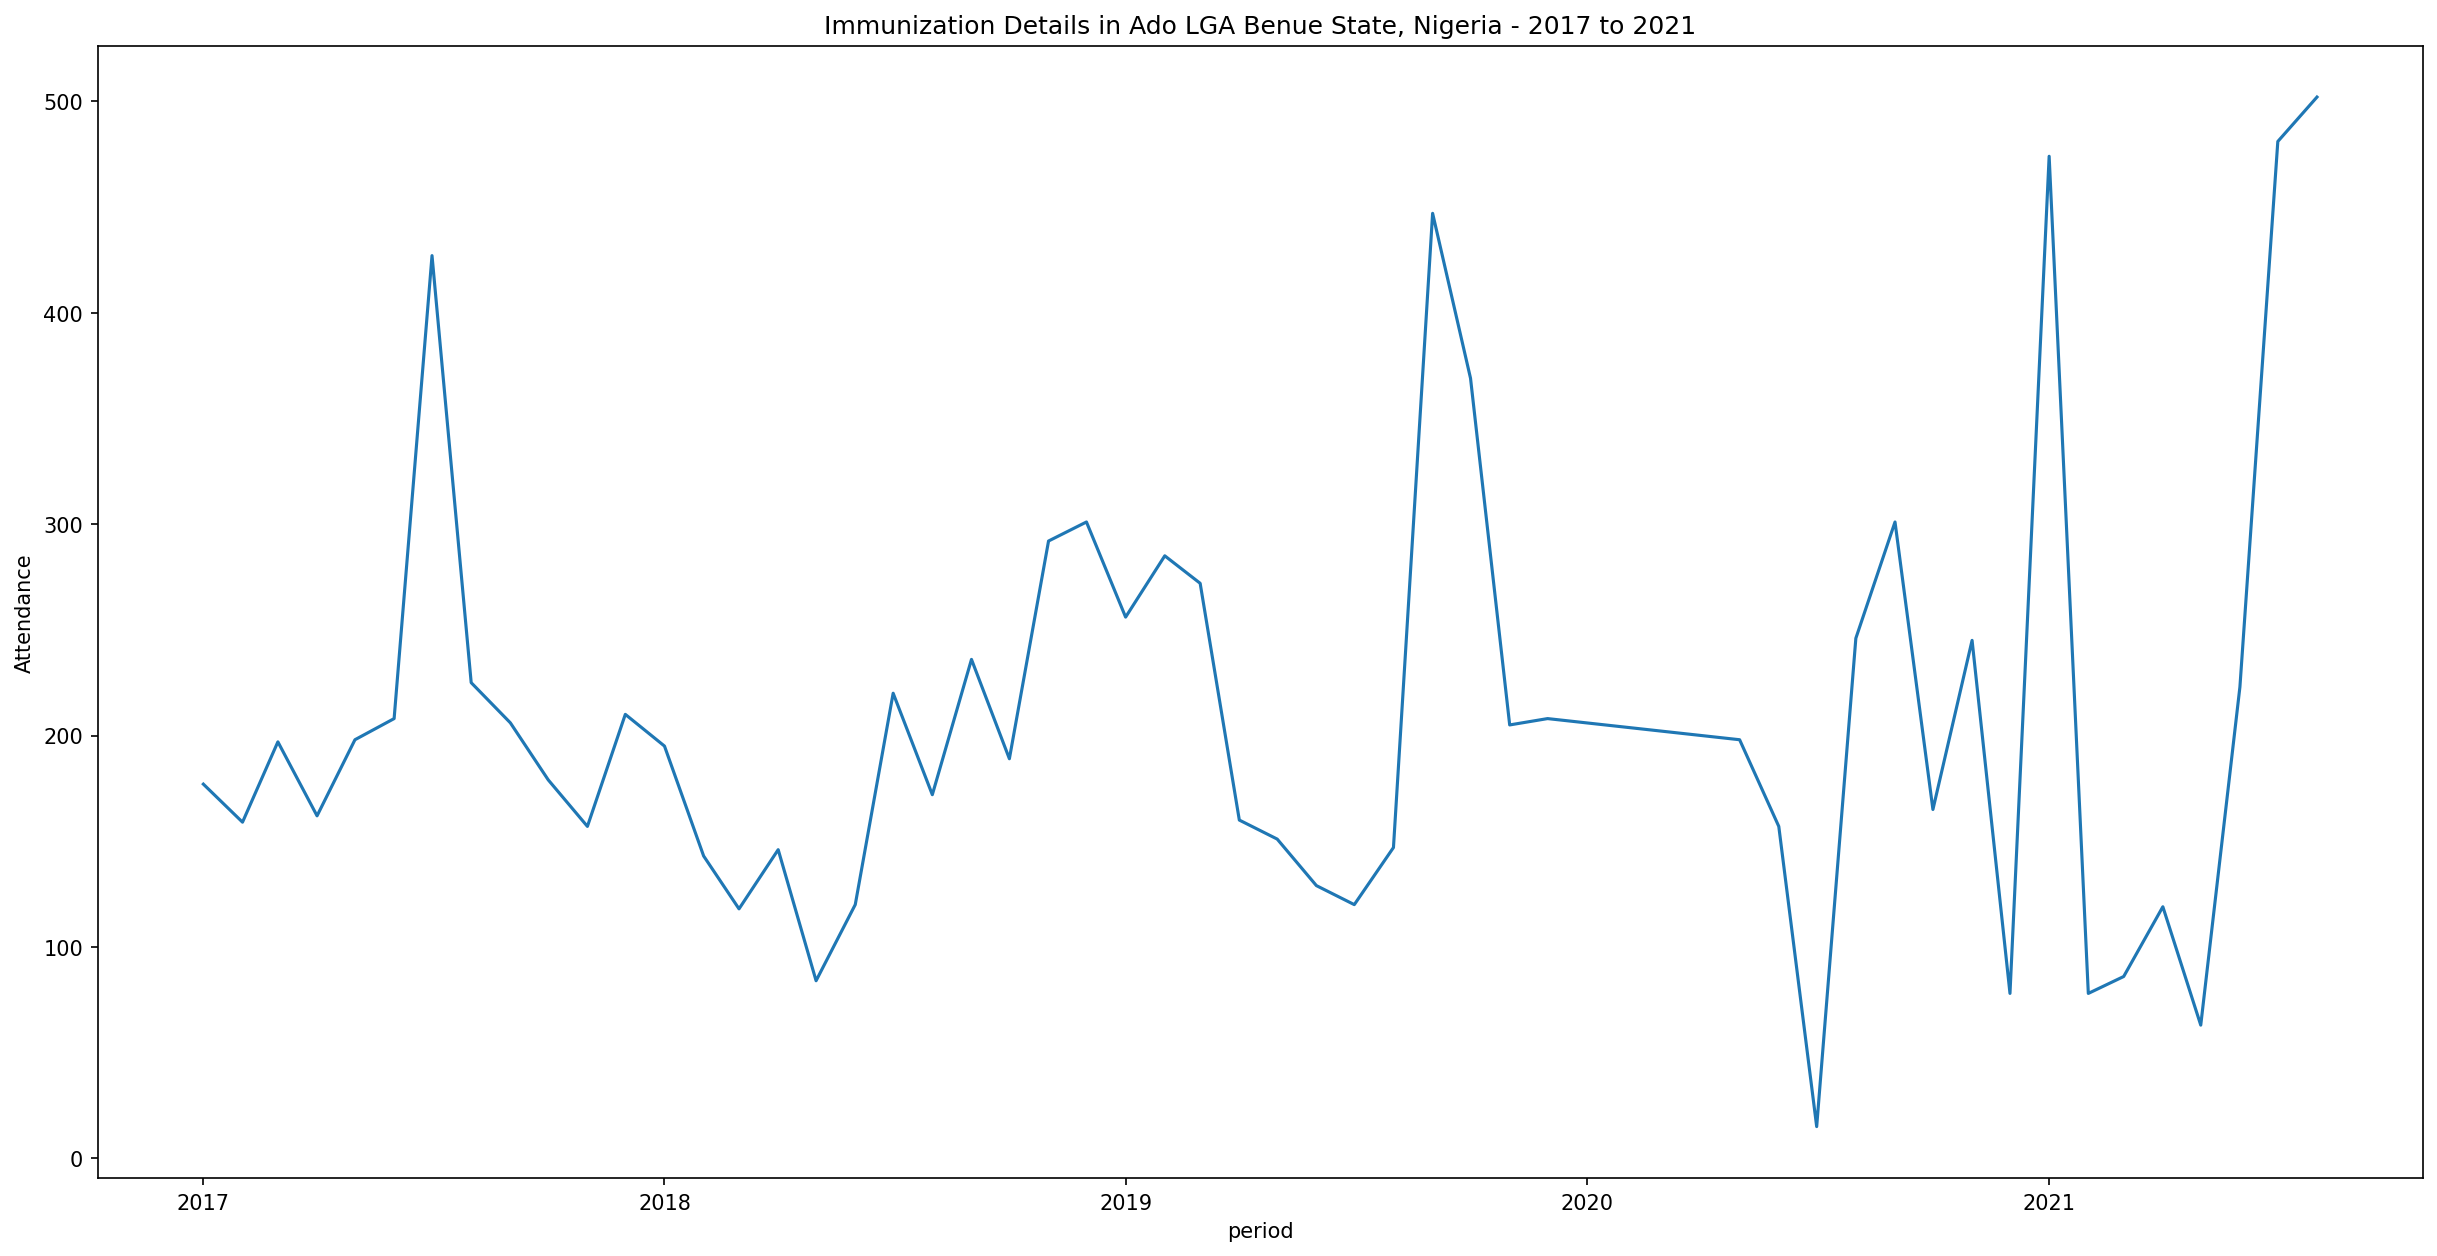

In [10]:
#visualize the data frame as a time - series plot
plt.figure(figsize=(20, 10), dpi=150)
plt.plot(df.index, df['fully_immunized'], color='tab:blue')
plt.gca().set(title='Immunization Details in Ado LGA Benue State, Nigeria - 2017 to 2021', 
xlabel='period', ylabel='Attendance')
plt.show()

<AxesSubplot:title={'center':'Immunization Details in Ado LGA Benue State, Nigeria - 2017 to 2021'}, xlabel='period'>

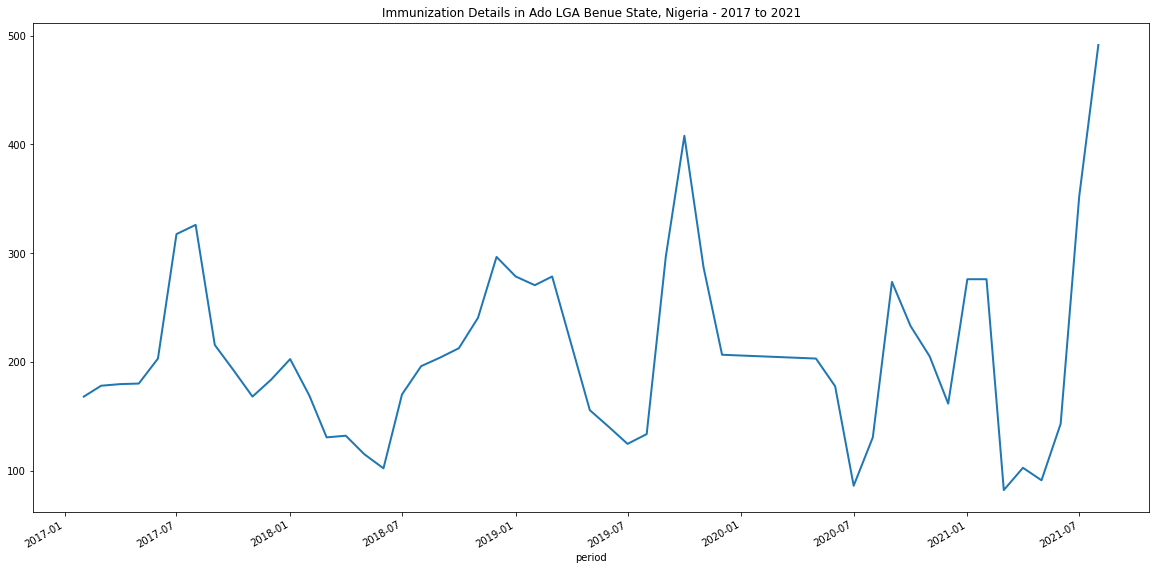

In [11]:
#Smoothing the dataplot using Moving Average Technique
#Since our dataset is not recorded in days(Not bogus), we use a rolling window of 2
Mkd_Attendance_mean = df['fully_immunized'].rolling(window=2).mean()
Mkd_Attendance_mean.plot(figsize=(20, 10), linewidth=2, y='Attendance',
color='tab:blue', title='Immunization Details in Ado LGA Benue State, Nigeria - 2017 to 2021')

In [12]:
#differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['fully_immunized'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#This is to check if the series is stationery, from this, we know that the series is not stationary
#Because the p-value is greater than 0.05

ADF Statistic: -4.806453
p-value: 0.000053


In [21]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(df.fully_immunized.diff()); axes[0].set_title('1st Differencing')
# axes[1].set(ylim=(0,1.2))
# plot_acf(df.fully_immunized.diff().dropna(), ax=axes[1])

# plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA order (p,d,q)
df.index = pd.DatetimeIndex(df.index).to_period('M')
model = ARIMA(df.fully_immunized, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        fully_immunized   No. Observations:                   52
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -311.085
Date:                Mon, 13 Dec 2021   AIC                            630.169
Time:                        23:46:34   BIC                            637.897
Sample:                    01-31-2017   HQIC                           633.122
                         - 08-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2613      0.710      0.368      0.713      -1.130       1.652
ma.L1         -0.9529     26.136     -0.036      0.971     -52.179      50.273
ma.L2         -0.0468      1.169     -0.040      0.9

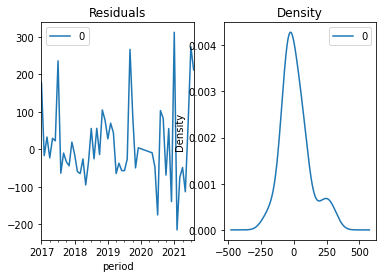

In [19]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [22]:
model_fit.get_prediction(2017, 2021, dynamic=False)

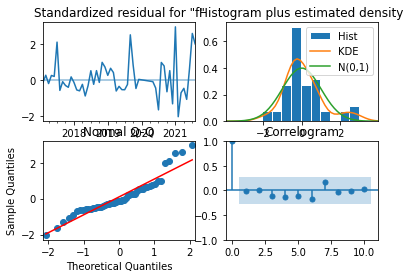

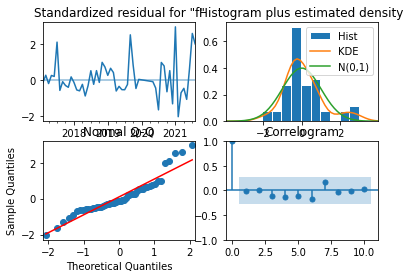

In [23]:
model_fit.plot_diagnostics()

In [170]:
print(residuals.describe())

                   0
count      30.000000
mean    12863.297409
std     53476.993079
min    -64588.557200
25%     -2223.974785
50%       584.752379
75%      4966.913653
max    179757.373568


<AxesSubplot:xlabel='period'>

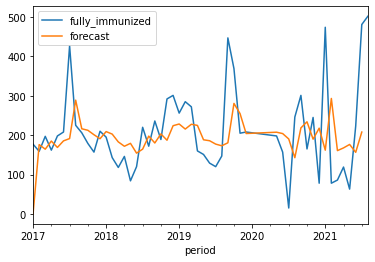

In [24]:
import statsmodels.api as sm
df['forecast']=model_fit.predict(start=0,end=50,dynamic=False)
df[['fully_immunized','forecast']].plot(figsize=(6,4))